Step one: find the Max and Min point of the stock price

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
#解决中文问题
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline 
#使图片内嵌交互环境显示

In [18]:
fpath="./Desktop/量化/task1.xlsx"
data=pd.read_excel(fpath)

In [19]:
data['Date']=pd.to_datetime(data['Date'])

In [43]:
data['max2here']=data['close'].expanding().max()
data['dd2here']=data['close']/data['max2here']
end_date,end_date_price,remains=tuple(data.sort_values(by=['dd2here']).iloc[0][['Date','close','dd2here']])
start_date,start_date_price=data[data['Date']<=end_date]\
.sort_values(by='close',ascending=False)\
.iloc[0][['Date','close']]
print('最大回撤率(%)为：',round((1-remains) * 100,2))
print('最大回撤开始时间为：',start_date)
print('最大回撤结束时间为：',end_date)

最大回撤率(%)为： 24.45
最大回撤开始时间为： 2018-05-15 00:00:00
最大回撤结束时间为： 2019-01-03 00:00:00


Step two：Plot the Max and Min withdrawal point and draw it

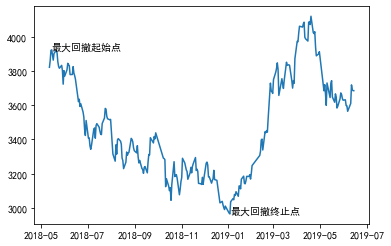

In [44]:
x=data['Date']
y=data['close']

def graph_data():
 fig = plt.figure()
 ax = plt.subplot2grid((1,1), (0,0))
 ax.plot(x,y)
 ax.annotate('最大回撤起始点',(start_date,start_date_price))
 ax.annotate('最大回撤终止点',(end_date,end_date_price))
 plt.show()
graph_data()



In [45]:
data

,Date,close,max2here,dd2here
0,2018-05-12,3822.0873,3822.0873,1.000000
1,2018-05-13,3860.3456,3860.3456,1.000000
2,2018-05-14,3921.2345,3921.2345,1.000000
3,2018-05-15,3924.0975,3924.0975,1.000000
4,2018-05-16,3892.8442,3924.0975,0.992036
...,...,...,...,...
263,2019-06-10,3610.7435,4120.6078,0.876265
264,2019-06-11,3719.2759,4120.6078,0.902604
265,2019-06-12,3691.0957,4120.6078,0.895765
266,2019-06-13,3685.3933,4120.6078,0.894381
